In [ ]:
#!pip install nltk

## EDA ON GULF TWEETS

In [1]:
import nltk

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
pd.options.display.max_colwidth = 75

In [89]:
pwd

'/home/jovyan/capstone-35/gulf_twitter_raw/gulf_timelines'

In [84]:
#cd ../../capstone-35/gulf_twitter_raw/gulf_timelines/

/home/jovyan/capstone-35/gulf_twitter_raw/gulf_timelines


In [90]:
cd ../../../capstone-35/gulf_twitter_pickled

/home/jovyan/capstone-35/gulf_twitter_pickled


In [93]:
ls

stream_أثول.p                    user_timeline_amalh2719.p
stream_الطريج.p                  user_timeline_BX4XBX.p
stream_تميلح.p                   user_timeline_fhth2020.p
stream_ثقيل.p                    user_timeline_g6vvngu.p
stream_مغسلة.p                   user_timeline_hnooo922.p
user_timeline_6al_asmaaa_.p      user_timeline__khaledalkuwari.p
user_timeline_Abdulelah__ITTI.p  user_timeline_Re9912Re.p
user_timeline_alobisan.p         user_timeline_twl_w.p


### Instantiate cleaned pickles

In [94]:
df_batch_1 = pd.read_pickle('../gulf_twitter_pickled/user_timeline_Re9912Re.p')

### Identify most frequent `locations` and `names`

In [95]:
df_batch_1.cleaned_geo.value_counts().head()

Saudi Arabia    2622
Name: cleaned_geo, dtype: int64

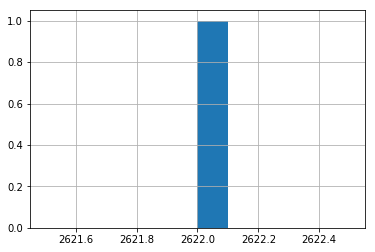

In [96]:
df_batch_1.cleaned_geo.value_counts().hist()

In [97]:
df_batch_1.cleaned_name.value_counts().head()

Re9912Re    2622
Name: cleaned_name, dtype: int64

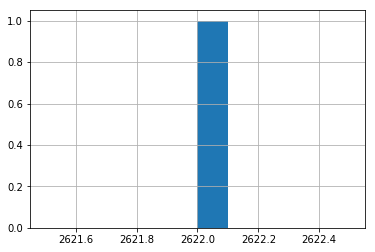

In [98]:
df_batch_1.cleaned_name.value_counts().hist()

In [99]:
df_batch_1.cleaned_geo.unique()

array(['Saudi Arabia'], dtype=object)

In [100]:
df_batch_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 3198
Data columns (total 3 columns):
cleaned_text    2622 non-null object
cleaned_name    2622 non-null object
cleaned_geo     2622 non-null object
dtypes: object(3)
memory usage: 81.9+ KB


In [101]:
df_batch_1.cleaned_name.nunique()

1

__Finding users with highest lexical diversity scores to add them to timelines search__

In [102]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [103]:
#creating cleaned text score in a new column
df_batch_1['cleaned_text_score'] = df_batch_1['cleaned_text'].map(lambda x: lexical_diversity(x))

In [104]:
#creating length of cleaned text in a new column to remove short tweets w/high lexical diversity score
df_batch_1['cleaned_text_len'] = df_batch_1['cleaned_text'].map(lambda x: len(x))

In [105]:
#creating mask of tweets w/ lexical diversity scores over 0.4
df_highest_user_scores = df_batch_1.loc[df_batch_1['cleaned_text_score'] >= 0.4, ['cleaned_name','cleaned_text_score', 'cleaned_text', 'cleaned_text_len']]

In [106]:
#adding mask to exclude tweets under 40 characters
df_highest_user_scores[(df_highest_user_scores['cleaned_text_score'] >= 0.10) 
                         & (df_highest_user_scores['cleaned_text_len'] >= 10)]

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
3,Re9912Re,0.400000,ب الصلاه والفلوس والنوم والسفر,30
5,Re9912Re,0.800000,طب وش عطرك,10
6,Re9912Re,0.550000,بخيغ فصفص اخباغك انت,20
13,Re9912Re,0.642857,ياحلوه ي كتكوت,14
16,Re9912Re,0.733333,اغلبهم ثوم وبيض,15
17,Re9912Re,0.818182,الله يعينكم,11
19,Re9912Re,0.705882,يسعد صباحك ياقلبي,17
20,Re9912Re,0.575758,ابد شبعت نوم وكمان صاحيه من الفجر,33
25,Re9912Re,0.521739,حنه حنه وفي احلا من كدا,23
29,Re9912Re,0.700000,مسموح للكل,10


In [107]:
df_highest_user_scores.sort_values('cleaned_text_score', ascending=False).head()

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
3197,Re9912Re,1.0,نسولف,5
2238,Re9912Re,1.0,نيڨر,4
2223,Re9912Re,1.0,فخامه,5
2208,Re9912Re,1.0,تسلاب,5
2151,Re9912Re,1.0,متل,3


### Conduct EDA on tweets

In [55]:
word_list = [word for line in df_batch_1['cleaned_text'] for word in line.split()]

In [79]:
word_list[:10]

['أقبلت',
 'تدفع',
 'عجل',
 'كرسيّها',
 'وتعدي',
 'خايف',
 'ومرتاب',
 'لأجل',
 'أم',
 'الستر']

In [70]:
word_list.count('عجل')

2

In [58]:
len(word_list)

29871

In [59]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

13584

In [60]:
from nltk.text import Text  

In [61]:
text_eda = Text(word_list)

In [62]:
def percentage(count, total):
    return 100 * count / total

In [71]:
percentage(text_eda.count('عجل'), len(text_eda))

0.00669545713233571

In [78]:
text_eda.concordance("موصج")

No matches


In [65]:
from nltk import FreqDist

In [66]:
fdist1 = FreqDist(text_eda)

In [67]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:10]

['أقبلت',
 'تدفع',
 'عجل',
 'كرسيّها',
 'وتعدي',
 'خايف',
 'ومرتاب',
 'لأجل',
 'أم',
 'الستر']

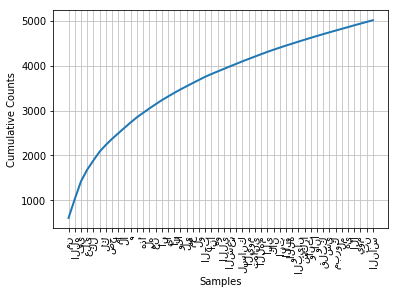

In [68]:
fdist1.plot(50, cumulative=True)

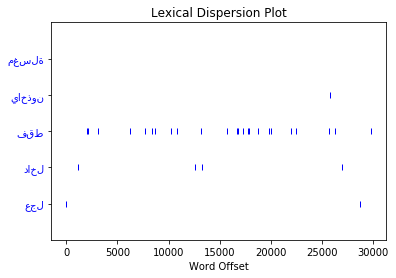

In [73]:
text_eda.dispersion_plot([u"مغسلة", "ياخذون", "فقط", "داخل", "عجل"])

In [80]:
text_eda.similar("عجل")

In [ ]:
sorted([w for w in set(word_list) if len(w) > 2 and fdist1[w] > 10])

In [ ]:
word_length = [len(w) for w in text_eda]

In [ ]:
word_length[:10]

In [ ]:
fdist = FreqDist([len(w) for w in text_eda])

In [ ]:
print(fdist)

In [ ]:
fdist.items()

In [ ]:
fdist.max()

In [ ]:
fdist.freq(2)